In [86]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [87]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [88]:
X.shape

(178, 13)

In [89]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [90]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [93]:
df = X.join(pd.Series(y, name='class'))

In [94]:
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [100]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    
    s = np.zeros((13,13))

In [102]:
for index, row in rows.iterrows():
        x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
        
        s += (x - mc).dot((x - mc).T)    
within_class_scatter_matrix += s

In [103]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))

In [62]:
# 전체 data를 training set과 test set으로 split
from sklearn.model_selection import train_test_split

X, y = dat_wine.iloc[:,1:].values, dat_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


### Linear Discriminant Analysis

In [64]:
# Iris data에 대한 LDA 적합
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Train LDA
lda_model=LinearDiscriminantAnalysis(store_covariance=True)
lda_model.fit(X_train, y_train) # LDA 적합

# Predict
y_test_pred=lda_model.predict(X_test)
print(accuracy_score(y_test, y_test_pred)) # test data에 대한 accuracy

0.9814814814814815


In [65]:
# 분류 결과
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

[[18  0  0]
 [ 0 20  1]
 [ 0  0 15]]


In [66]:
lda_model.predict_proba(X_test)

array([[4.82027630e-11, 9.53699966e-06, 9.99990463e-01],
       [4.16120014e-19, 1.20023483e-09, 9.99999999e-01],
       [4.13851085e-15, 2.75591141e-12, 1.00000000e+00],
       [7.51250315e-05, 9.99924835e-01, 3.97700359e-08],
       [5.24688464e-07, 9.99999475e-01, 9.27968095e-16],
       [9.99999998e-01, 1.74318959e-09, 1.39954629e-15],
       [5.90573057e-06, 9.99994094e-01, 1.08785964e-12],
       [9.99623385e-01, 3.76614609e-04, 5.81972929e-10],
       [1.01441762e-06, 9.99998985e-01, 3.75285090e-10],
       [3.25174638e-13, 4.55685608e-06, 9.99995443e-01],
       [2.04024657e-18, 5.53322184e-09, 9.99999994e-01],
       [1.00000000e+00, 1.19409600e-10, 2.11019239e-19],
       [2.71821361e-04, 9.99725145e-01, 3.03353145e-06],
       [9.99999997e-01, 2.99683870e-09, 6.86711720e-14],
       [1.28687075e-10, 2.09132713e-04, 9.99790867e-01],
       [2.49553743e-08, 9.99999971e-01, 3.95543451e-09],
       [9.99997331e-01, 2.66878279e-06, 9.95047383e-16],
       [9.40514712e-01, 5.94852

### Quadratic Discriminant Analysis

In [67]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Train QDA
qda_model=QuadraticDiscriminantAnalysis(store_covariance=True)
qda_model.fit(X_train, y_train) # QDA 적합

# predict
y_test_pred=qda_model.predict(X_test)
print(accuracy_score(y_test, y_test_pred)) # test data에 대한 accuracy

0.9629629629629629


In [68]:
# 분류 결과
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

[[18  0  0]
 [ 1 20  0]
 [ 0  1 14]]


In [69]:
qda_model.predict_proba(X_test)

array([[1.07823805e-035, 2.60981206e-008, 9.99999974e-001],
       [1.10584322e-039, 3.49056549e-024, 1.00000000e+000],
       [1.58369913e-088, 7.55372036e-040, 1.00000000e+000],
       [4.83304700e-003, 9.95166953e-001, 3.33058238e-061],
       [2.12394858e-014, 1.00000000e+000, 7.23161042e-114],
       [1.00000000e+000, 1.22762207e-016, 6.65135948e-146],
       [7.79670427e-008, 9.99999922e-001, 1.18680683e-056],
       [9.99999932e-001, 6.77887539e-008, 1.12372096e-071],
       [4.37021613e-010, 1.00000000e+000, 3.96842378e-056],
       [1.32680549e-032, 9.06254669e-001, 9.37453308e-002],
       [8.97018071e-057, 3.46593288e-022, 1.00000000e+000],
       [1.00000000e+000, 9.28366743e-016, 1.13459289e-128],
       [8.62682579e-017, 1.00000000e+000, 1.57953939e-038],
       [1.00000000e+000, 1.29184368e-014, 7.43510783e-116],
       [7.57760890e-028, 8.56423422e-009, 9.99999991e-001],
       [1.68672641e-007, 9.99999831e-001, 4.26026248e-041],
       [1.00000000e+000, 2.35217209e-010

### Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Train Model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Predict
y_test_pred=gnb_model.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.9814814814814815


In [71]:
# 분류 결과
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

[[17  1  0]
 [ 0 21  0]
 [ 0  0 15]]


### Compare

In [73]:
lda_model.predict_proba(X_test)

array([[4.82027630e-11, 9.53699966e-06, 9.99990463e-01],
       [4.16120014e-19, 1.20023483e-09, 9.99999999e-01],
       [4.13851085e-15, 2.75591141e-12, 1.00000000e+00],
       [7.51250315e-05, 9.99924835e-01, 3.97700359e-08],
       [5.24688464e-07, 9.99999475e-01, 9.27968095e-16],
       [9.99999998e-01, 1.74318959e-09, 1.39954629e-15],
       [5.90573057e-06, 9.99994094e-01, 1.08785964e-12],
       [9.99623385e-01, 3.76614609e-04, 5.81972929e-10],
       [1.01441762e-06, 9.99998985e-01, 3.75285090e-10],
       [3.25174638e-13, 4.55685608e-06, 9.99995443e-01],
       [2.04024657e-18, 5.53322184e-09, 9.99999994e-01],
       [1.00000000e+00, 1.19409600e-10, 2.11019239e-19],
       [2.71821361e-04, 9.99725145e-01, 3.03353145e-06],
       [9.99999997e-01, 2.99683870e-09, 6.86711720e-14],
       [1.28687075e-10, 2.09132713e-04, 9.99790867e-01],
       [2.49553743e-08, 9.99999971e-01, 3.95543451e-09],
       [9.99997331e-01, 2.66878279e-06, 9.95047383e-16],
       [9.40514712e-01, 5.94852

In [74]:
qda_model.predict_proba(X_test)

array([[1.07823805e-035, 2.60981206e-008, 9.99999974e-001],
       [1.10584322e-039, 3.49056549e-024, 1.00000000e+000],
       [1.58369913e-088, 7.55372036e-040, 1.00000000e+000],
       [4.83304700e-003, 9.95166953e-001, 3.33058238e-061],
       [2.12394858e-014, 1.00000000e+000, 7.23161042e-114],
       [1.00000000e+000, 1.22762207e-016, 6.65135948e-146],
       [7.79670427e-008, 9.99999922e-001, 1.18680683e-056],
       [9.99999932e-001, 6.77887539e-008, 1.12372096e-071],
       [4.37021613e-010, 1.00000000e+000, 3.96842378e-056],
       [1.32680549e-032, 9.06254669e-001, 9.37453308e-002],
       [8.97018071e-057, 3.46593288e-022, 1.00000000e+000],
       [1.00000000e+000, 9.28366743e-016, 1.13459289e-128],
       [8.62682579e-017, 1.00000000e+000, 1.57953939e-038],
       [1.00000000e+000, 1.29184368e-014, 7.43510783e-116],
       [7.57760890e-028, 8.56423422e-009, 9.99999991e-001],
       [1.68672641e-007, 9.99999831e-001, 4.26026248e-041],
       [1.00000000e+000, 2.35217209e-010

In [72]:
gnb_model.predict_proba(X_test)

array([[3.19454660e-19, 9.51002328e-04, 9.99048998e-01],
       [1.16786612e-15, 1.09395103e-05, 9.99989060e-01],
       [2.32660299e-21, 1.89115739e-17, 1.00000000e+00],
       [8.23874932e-08, 9.99999918e-01, 9.84874782e-18],
       [2.35000790e-07, 9.99999765e-01, 2.56197108e-33],
       [1.00000000e+00, 6.68703698e-15, 6.40473504e-42],
       [3.68867795e-07, 9.99999631e-01, 7.59602896e-21],
       [9.99926652e-01, 7.33481186e-05, 7.61671538e-17],
       [6.56354469e-08, 9.99999934e-01, 2.59990118e-20],
       [4.82389768e-30, 9.17151905e-06, 9.99990828e-01],
       [4.39335240e-23, 5.71710905e-09, 9.99999994e-01],
       [1.00000000e+00, 2.09709898e-11, 5.07260774e-42],
       [1.89506401e-03, 9.98104936e-01, 5.55197552e-21],
       [1.00000000e+00, 3.92962162e-14, 2.96206908e-31],
       [1.26235467e-18, 3.60330767e-05, 9.99963967e-01],
       [9.72106185e-08, 9.99999903e-01, 8.01041782e-15],
       [9.99999977e-01, 2.27614147e-08, 3.94813637e-39],
       [2.66728538e-02, 9.73327

### Plotting

In [77]:
def add_labels(standardized=False):
    plt.title('Iris dataset visualized')
    if standardized:
        plt.xlabel('Petal Length (standardized)')
        plt.ylabel('Petal Width (standardized)')
    else:
        plt.xlabel('Petal Length (cm)')
        plt.ylabel('Petal Width (cm)')
    plt.tight_layout()
    plt.show()

In [76]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

ValueError: Filler values must be provided when X has more than 2 training features.

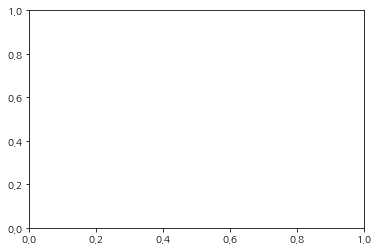

In [79]:
# Plot decision regions
plot_decision_regions(
    X, y, clf=gnb_model, legend=2, X_highlight=X, colors='red,blue,green'
)
add_labels()